In [15]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [16]:
df = pd.read_pickle('../data/cardio_processed_over.pkl')
df.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,...,glucose,education_1.0,education_2.0,education_3.0,education_4.0,is_smoking_NO,is_smoking_YES,sex_F,sex_M,TenYearCHD
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,...,0.142857,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,...,-0.214286,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,...,1.142857,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,...,1.142857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,...,-0.071429,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [17]:
X1 = df.drop('TenYearCHD', axis = 1)
y1 = df['TenYearCHD']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [19]:
param_over = {"max_depth": [9, 10, 11, 12], 
        "max_features": [2, 3, 4, 5],
        "min_samples_split": [50, 100, 150],
        "min_samples_leaf": [10, 20, 50]} 

In [20]:
gs_rf = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), # tipo de modelo que queremos hacer
            param_grid= param_over, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=0) # para que no nos printee ningún mensaje en pantalla

In [21]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [9, 10, 11, 12],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [10, 20, 50],
                         'min_samples_split': [50, 100, 150]})

In [22]:
forest = gs_rf.best_estimator_
forest

RandomForestClassifier(max_depth=12, max_features=5, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)

In [23]:
y_pred_test_rf = forest.predict(x_test)
y_pred_train_rf = forest.predict(x_train)

In [24]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, model):
    
    # test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({'accuracy': [accuracy_test, accuracy_train], 
                    'precision': [precision_test, precision_train],
                    'recall': [recall_test, recall_train], 
                    'f1': [f1_test, f1_train],
                    'kapppa': [kappa_test, kappa_train],
                    'set': ['test', 'train']})
    
    df['model'] = model

    return df

In [25]:
dt_results = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, 'Random Forest')
dt_results

,accuracy,precision,recall,f1,kapppa,set,model
0,0.785590,0.760726,0.818828,0.788708,0.571684,test,Random Forest
1,0.838689,0.825673,0.860967,0.842951,0.677289,train,Random Forest


IMPORTANCIA PREDICTORAS!!!!

In [26]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                            'importancia': forest.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
6,age,0.209968
9,sysBP,0.174433
8,totChol,0.101155
12,glucose,0.100151
10,BMI,0.087042
11,heartRate,0.077506
4,prevalentHyp,0.051909
7,cigsPerDay,0.051388
0,age_category,0.034409
20,sex_M,0.016363


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='importancia', ylabel='predictor'>

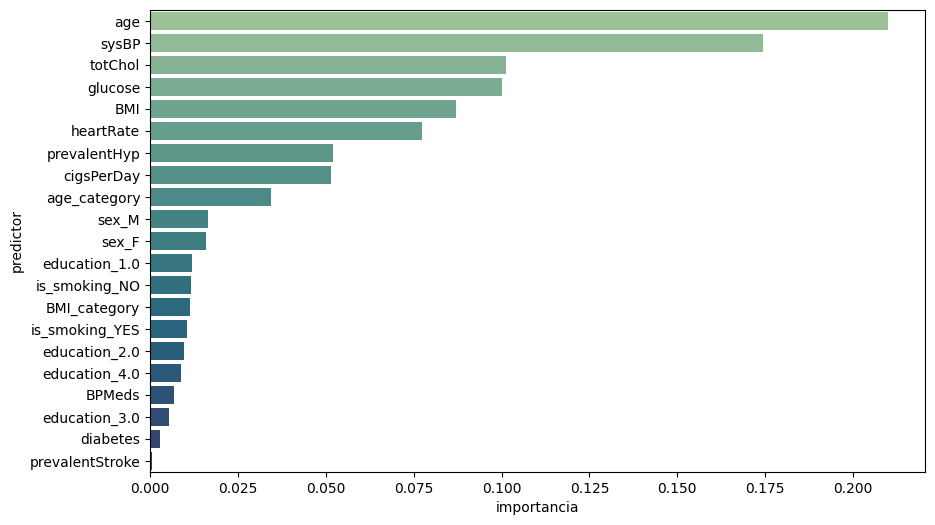

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="crest");
plt.show()